In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
tf.test.is_built_with_gpu_support()

True

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[index])

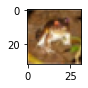

In [10]:
plot_sample(0)

In [11]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

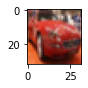

In [12]:
plot_sample(5)

In [13]:
y_train[5]

array([1], dtype=uint8)

In [14]:
classes[y_train[5][0]]

'automobile'

In [15]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [16]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu',kernel_initializer='he_uniform'),
    keras.layers.Dense(1000,activation="relu",kernel_initializer='he_uniform'),    
    keras.layers.Dense(10,kernel_initializer='glorot_uniform', activation='sigmoid')
])

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_scaled,y_train_categorical,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.7921 - accuracy: 0.3610
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5981 - accuracy: 0.4372
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5124 - accuracy: 0.4664
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4508 - accuracy: 0.4903
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4008 - accuracy: 0.5086
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3555 - accuracy: 0.5266
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3166 - accuracy: 0.5423
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2767 - accuracy: 0.5558
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2415 - accuracy: 0.5650
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.207

In [20]:
model.evaluate(x_test_scaled,y_test_categorical)

313/313 [==============================] - 1s 2ms/step - loss: 1.3706 - accuracy: 0.5110


[1.3706285953521729, 0.5109999775886536]

In [21]:
classes[np.argmax(model.predict(x_test_scaled)[500])]

'frog'

In [22]:
classes[y_test[500][0]]

'deer'

In [23]:
def get_model():
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu',kernel_initializer='he_uniform'),
    keras.layers.Dense(1000,activation="relu",kernel_initializer='he_uniform'),    
    keras.layers.Dense(10,kernel_initializer='glorot_uniform', activation='sigmoid')
    ])
    
    model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model
    

In [24]:
# %%timeit -n1 -r1
# with tf.device('/CPU:0'):
#     cpu_model = get_model()
#     cpu_model.fit(x_train_scaled,y_train_categorical,epochs=10)

In [25]:
# %%timeit -n1 -r1
# with tf.device('/GPU:0'):
#     cpu_model = get_model()
#     cpu_model.fit(x_train_scaled,y_train_categorical,epochs=10)